**This note book contains the first three tasks in Machine Learning Internship program by NeuronetiX, covering Linear Regression, Polynomial Linear Regression and Multiple Linear Regression**

In [51]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# Simple linear regression - TASK NO. 1

## Importing and Reading data

In [2]:
# importing dataset from kaggle
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression


cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 747kB/s]


In [3]:
! unzip salary-dataset-simple-linear-regression.zip

Archive:  salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [5]:
# reading dataset
df = pd.read_csv('/content/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
x = df['YearsExperience']
y = df['Salary']

## Visualizing data and Model fitting

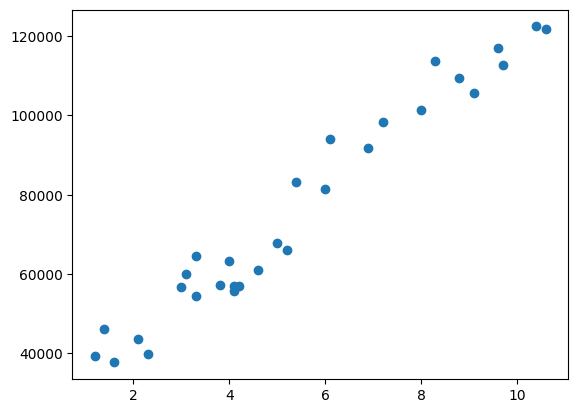

In [7]:
plt.scatter(x,y)
plt.show()

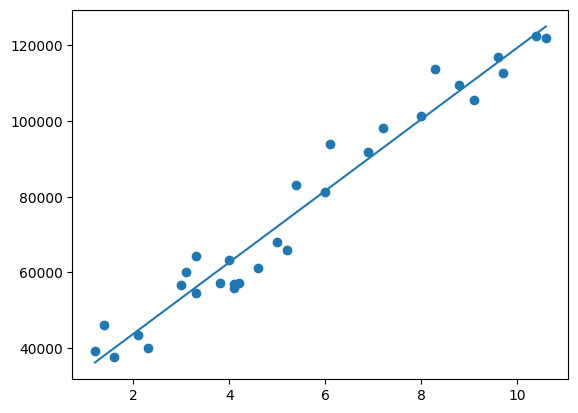

In [8]:
slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

## Relationship

In [11]:
print('The relationship between the values of the x-axis and the values of the y-axis is: ', r)

The relationship between the values of the x-axis and the values of the y-axis is:  0.9782416184887599


# Polynomial Linear Regression Dataset - TASK NO. 2

## Importing and Reading data

In [14]:
! kaggle datasets download -d parteekbhatia/polynomial-linear-regression-dataset

Dataset URL: https://www.kaggle.com/datasets/parteekbhatia/polynomial-linear-regression-dataset
License(s): unknown
  0% 0.00/331 [00:00<?, ?B/s]
100% 331/331 [00:00<00:00, 965kB/s]


In [15]:
! unzip polynomial-linear-regression-dataset.zip

Archive:  polynomial-linear-regression-dataset.zip
  inflating: rank_salary.csv         


In [16]:
data = pd.read_csv('/content/rank_salary.csv')
data.head()

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000


## Data Visulization and Model Fitting

In [17]:
x2 = data.Level
y2 = data.Salary

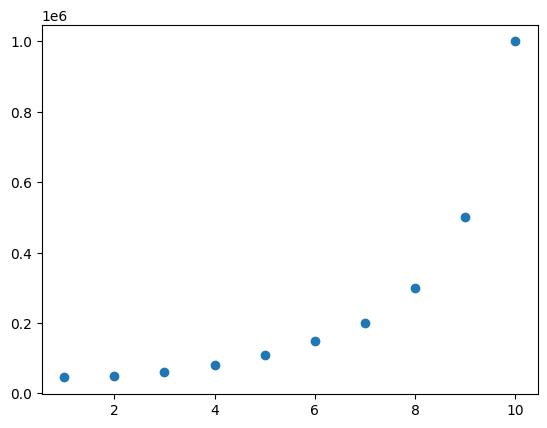

In [18]:
plt.scatter(x2,y2)
plt.show()

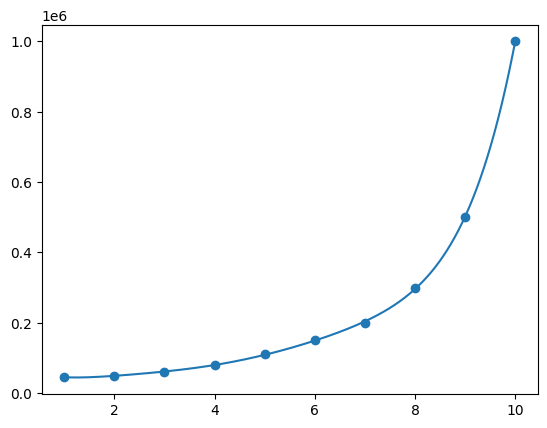

In [30]:
model = np.poly1d(np.polyfit(x2, y2, 6))

myline = np.linspace(1, 10, 10**6)

plt.scatter(x2, y2)
plt.plot(myline, model(myline))
plt.show()

## R-Squared

In [31]:
from sklearn.metrics import r2_score

In [32]:
print('R-Squared: ', r2_score(y2, model(x2)))

R-Squared:  0.9999494749253776


# Multiple Linear Regression Dataset - TASK NO. 3

## Importing and Reading data

In [33]:
! kaggle datasets download -d hussainnasirkhan/multiple-linear-regression-dataset


Dataset URL: https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset
License(s): CC0-1.0
  0% 0.00/367 [00:00<?, ?B/s]
100% 367/367 [00:00<00:00, 771kB/s]


In [34]:
! unzip multiple-linear-regression-dataset.zip

Archive:  multiple-linear-regression-dataset.zip
  inflating: multiple_linear_regression_dataset.csv  


In [52]:
dataframe = pd.read_csv('multiple_linear_regression_dataset.csv')
dataframe.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


## Data Visualization

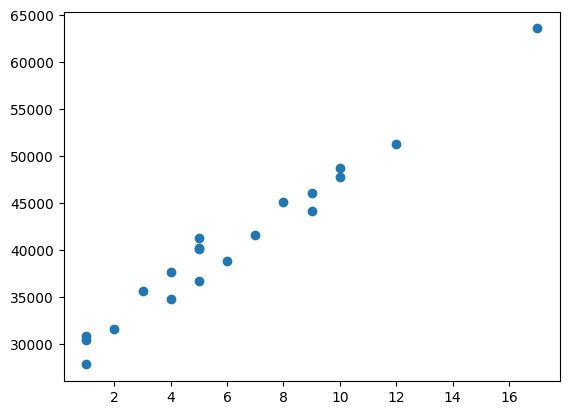

In [47]:
plt.scatter(dataframe.experience, dataframe.income)
plt.show()

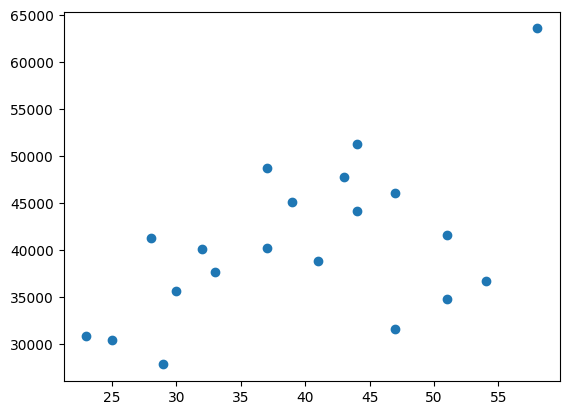

In [48]:
plt.scatter(dataframe.age, dataframe.income)
plt.show()

In [37]:
x3 = dataframe[['experience', 'age']]
y3 = dataframe['income']

In [38]:
mreg = LinearRegression()
mreg.fit(x3, y3)

LinearRegression()

## Coefficients and R-squared

In [41]:
print('Coefficients: ', mreg.coef_)

Coefficients:  [2162.40419192  -99.19535546]


In [46]:
print('the coefficient values of experience: ', mreg.coef_[0], end='\n\n')
print('the coefficient values of age       : ', mreg.coef_[1])

the coefficient values of experience:  2162.404191924113

the coefficient values of age       :  -99.19535546105372


**Those values tells us that if the :**
* **experience** increase 1 year, the income increases by **2162.4$**

* **age** increases 1 year, the income decrease by **99.2$**

In [50]:
print(r2_score(y3, mreg.predict(x3)))

0.9773361310180797
